In [45]:
import numpy as np

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np


def format_settings(
        wspace=0.25, 
        hspace=0.4, 
        left=0.12, 
        right=0.9, 
        bottom=0.15, 
        top=0.95,
        fs=12,
        dpi=300,
        lw=1.5,
        ms=5,
        axlw=1.5,
        major_tick_len=5,
        ):
    plt.rcParams['lines.linewidth'] = lw
    

    plt.rcParams['lines.markersize'] = ms

    plt.subplots_adjust(wspace=wspace, hspace=hspace, left=left, right=right, bottom=bottom, top=top)


    plt.rcParams['font.size'] = fs
    plt.rcParams['axes.labelsize'] = fs
    plt.rcParams['axes.titlesize'] = fs
    plt.rcParams['xtick.labelsize'] =fs
    plt.rcParams['ytick.labelsize'] = fs
    plt.rcParams['legend.fontsize'] = fs

    plt.rcParams['axes.linewidth'] = axlw

    plt.rcParams['xtick.major.width'] = axlw
    plt.rcParams['ytick.major.width'] = axlw

    plt.rcParams['xtick.major.size'] = major_tick_len
    plt.rcParams['ytick.major.size'] = major_tick_len

    plt.rcParams['xtick.minor.size'] = 0
    plt.rcParams['ytick.minor.size'] = 0

    plt.rcParams['xtick.major.pad'] = major_tick_len
    plt.rcParams['ytick.major.pad'] = major_tick_len

    plt.rcParams['xtick.minor.pad'] = 5
    plt.rcParams['ytick.minor.pad'] = 5

    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    plt.rcParams['xtick.top'] = False 
    plt.rcParams['ytick.right'] = False

    plt.rcParams['xtick.minor.visible'] = False
    plt.rcParams['ytick.minor.visible'] = False

    plt.rcParams['legend.frameon'] = False

    plt.rcParams['figure.dpi'] = dpi

    plt.rcParams['savefig.dpi'] = dpi



def get_color_list(n_colors, cmap='viridis', color_min=0.5, color_max=1, invert=False):

    colormap = plt.cm.get_cmap(cmap)
    if invert:
        color_list = [colormap(i) for i in np.linspace(color_max, color_min, n_colors)]
    else:
        color_list = [colormap(i) for i in np.linspace(color_min, color_max, n_colors)]
    return color_list


def get_color_groups(n_group, n_colors, cmap_list=None, color_min=0.5, color_max=1, invert=False):

    if cmap_list is None:
        cmap_list = ['Blues', 'Reds', 'Greens', 'Oranges', 'Greys', 'Purples', 'YlOrBr', 'PuBuGn', 'BuPu']
        
    color_groups = [get_color_list(n_colors, cmap=cmap_list[i], color_min=color_min, color_max=color_max, invert=invert) for i in range(n_group)]
    
    return color_groups


In [ ]:
import os
import numpy as np

import matplotlib.pyplot as plt

import re

def extract_deviation_43_acc(log_text):
    deviation_4_acc_list = []

    pattern = r'data type: 43_xel\s+Acc:\s*(\d+\.\d+)'
    matches = re.findall(pattern, log_text, re.MULTILINE)

    for match in matches:
        deviation_4_acc_list.append(float(match))
    
    if len(matches) == 0:
        deviation_4_acc_list.append(0)
    
    return deviation_4_acc_list

def extract_deviation_12_train_acc(log_text):
    deviation_4_acc_list = []
    
    pattern = r'data type: 12_xel\s+Acc:\s*(\d+\.\d+)'
    matches = re.findall(pattern, log_text, re.MULTILINE)
    
    for match in matches:
        deviation_4_acc_list.append(float(match))
    
    if len(matches) == 0:
        deviation_4_acc_list.append(0)
    
    return deviation_4_acc_list

def extract_deviation_12_test_acc(log_text):
    deviation_4_acc_list = []
    
    pattern = r'data type: 12_xm0\s+Acc:\s*(\d+\.\d+)'
    matches = re.findall(pattern, log_text, re.MULTILINE)
    
    for match in matches:
        deviation_4_acc_list.append(float(match))
    

    if len(matches) == 0:
        deviation_4_acc_list.append(0)
    
    return deviation_4_acc_list


def load_log_from_file(file_path):
    with open(file_path, 'r') as file:
        log_text = file.read()
    return log_text

std_lst=['0.4','0.45', '0.5', '0.55', '0.6', '0.65', '0.7', '0.75', '0.8']
wd_lst=['0.0', '0.01', '0.1', '1.0']
seed_lst=['1', '2', '3']

acc_matr_43_lst=[]
acc_matr_12_train_lst=[]
acc_matr_12_test_lst=[]

for seed in seed_lst:

    print(seed)

    acc_matr_43=np.zeros((len(wd_lst),len(std_lst)))
    acc_matr_12_train=np.zeros((len(wd_lst),len(std_lst)))
    acc_matr_12_test=np.zeros((len(wd_lst),len(std_lst)))

    for wd in wd_lst:

        for std in std_lst:

            path_L=f'/home/zhiqin/data/LLM/LLM_pami/LLM_init_exact/data_20w_diff_init_part_prenorm_new_init_train_last_token_composition_GPT2_init_for_diff_part_prenorm_nh_10_nl_10_without_34/GPT2_init_for_diff_part_prenorm_embedding_std_{std}_qk_std_{std}_vo_std_{std}_mlp_std_{std}/composition-N_200000-seed{seed}_wd_{wd}'


            log_file_path = path_L+'/train_log.log'

            log_text = load_log_from_file(log_file_path)

            deviation_43_acc_list = extract_deviation_43_acc(log_text)
            deviation_12_train_acc_list = extract_deviation_12_train_acc(log_text)
            deviation_12_test_acc_list = extract_deviation_12_test_acc(log_text)

            acc_matr_43[wd_lst.index(wd),std_lst.index(std)]=np.array(deviation_43_acc_list).max()
            acc_matr_12_train[wd_lst.index(wd),std_lst.index(std)]=np.array(deviation_12_train_acc_list).max()
            acc_matr_12_test[wd_lst.index(wd),std_lst.index(std)]=np.array(deviation_12_test_acc_list).max()

    print(acc_matr_43)
    print(acc_matr_12_train)
    print(acc_matr_12_test)


    acc_matr_43_lst.append(acc_matr_43)
    acc_matr_12_train_lst.append(acc_matr_12_train)
    acc_matr_12_test_lst.append(acc_matr_12_test)

print(np.mean(np.array(acc_matr_43_lst), axis=0))
print(np.mean(np.array(acc_matr_12_train_lst), axis=0))
print(np.mean(np.array(acc_matr_12_test_lst), axis=0))

In [47]:
np.array(acc_matr_12_test_lst).shape

(3, 4, 9)

<Figure size 1920x1440 with 0 Axes>

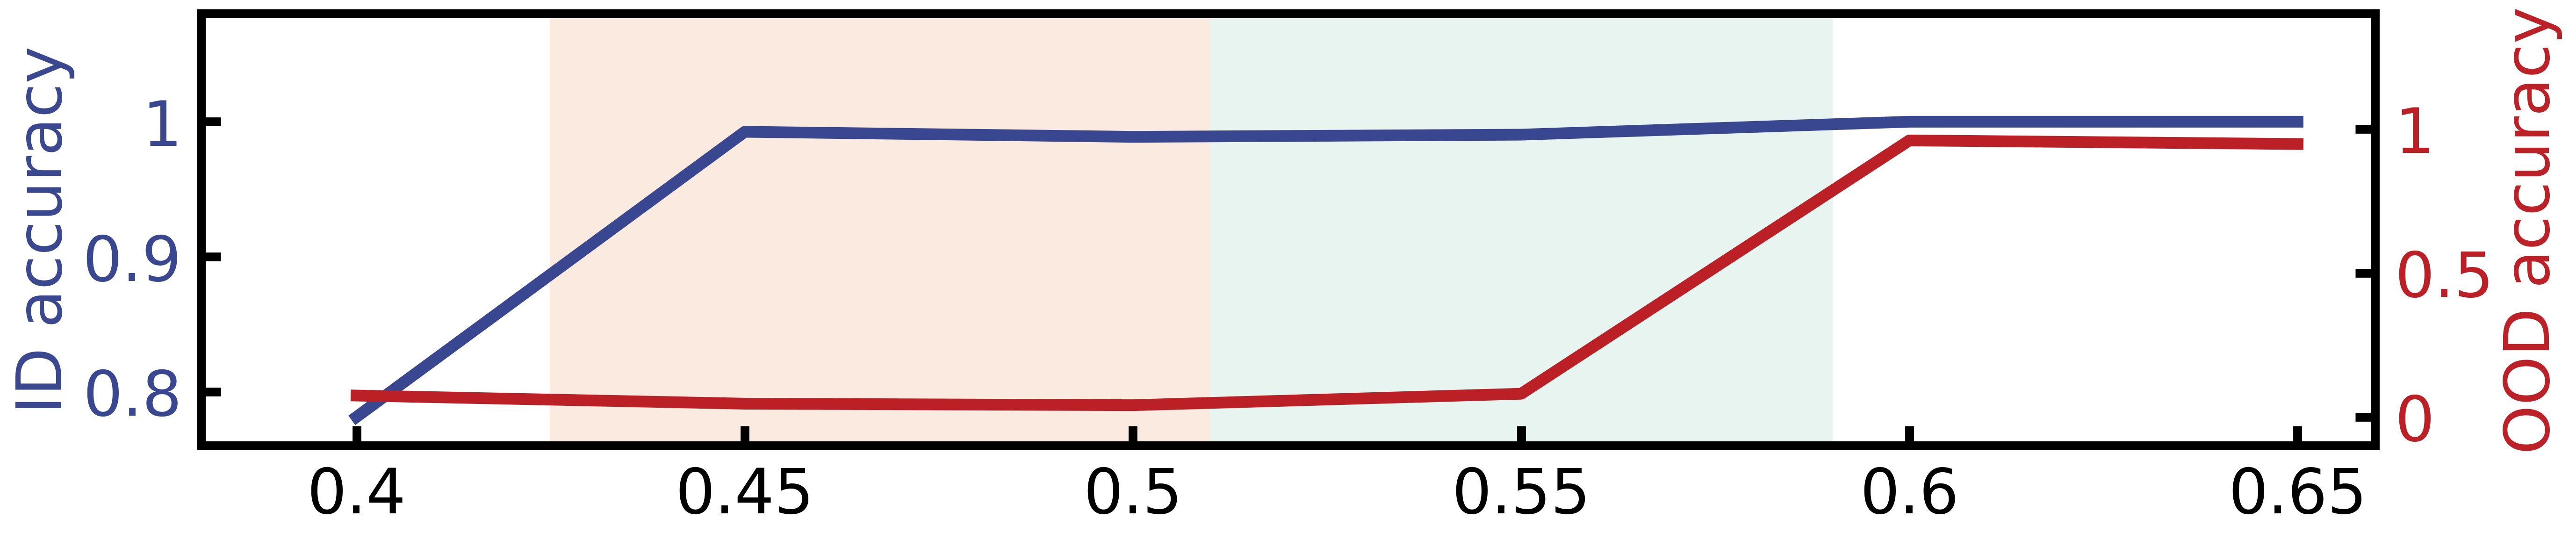

In [62]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Rectangle
from matplotlib.collections import LineCollection
format_settings(wspace=0.4, hspace=0.6, bottom=0.16, fs=32, lw=6, ms=12.5, axlw=4.5, major_tick_len=10)

t_lst_all=['0.4','0.45', '0.5', '0.55', '0.6', '0.65']
wd_lst=['0.0', '0.01', '0.1', '1.0']
plt.figure(figsize=(20,4))
ax=plt.gca()
ax_twin=ax.twinx()
line_color=['#BB2026', '#394790']
ax.plot(t_lst_all, np.mean(np.array(acc_matr_12_test_lst), axis=0)[1, :-3], color=line_color[1])
ax_twin.plot(t_lst_all, np.mean(np.array(acc_matr_43_lst), axis=0)[1, :-3], color=line_color[0])
ax.axvspan(0.5, 2.2, color='#FBEAE0',  zorder=0)
ax.axvspan(2.2, 3.8, color='#E8F4F0',  zorder=0)
ax.set_xlim(-0.4, 5.2)
ax.set_ylim(0.88, 1.04)
ax_twin.set_ylim(-0.1, 1.4)
ax.set_yticks([0.9, 0.95, 1])
ax_twin.set_yticks([0, 0.5, 1])
ax_twin.set_yticklabels([0, 0.5, 1],c=line_color[0])
ax.set_yticklabels( [0.8, 0.9, 1],c=line_color[1])
ax_twin.set_ylabel('OOD accuracy', c=line_color[0])
ax.set_ylabel('ID accuracy', c=line_color[1])
plt.savefig('/home/zhiqin/LLM_from_4090/plot_fot_pami/pic/phase_one_line.png', bbox_inches='tight', dpi=300)
